# Numerical solution of heat transfer in Cartesian coordinates

## Setup

A rectangle subdivided into 100 points in the $x$ direction and 50 points in the $y$ direction, having,

$x_0=0$; $x_1=161$

$y_0=0$; $y_1=100$

Therefore,

$\Delta x = \frac{161-0}{100-1}$ and $\Delta y = \frac{100-0}{50-1}$

The domain has adiabatic boundaries at $x=x_0$ and $x=x_1$, a constant temperature boundary at $y=y_0$, and a convective boundary at $y=y_1$. Furthermore, the domain has a thermal conductivity $k_a$ for $y_0\leq y < y_1/2$ (the bottom half) and $k_b$ for $y_1/2 < y\leq y_1$ (the top half).

## Derivation of numerical scheme

### Model equation

The governing equation follows from Fouriers Law and energy conservation:

$\rho c_p \frac{\partial T}{\partial t} - \nabla\left(k\cdot\nabla T\right) = 0$

In Cartesian coordinates, this is:

$\rho c_p \frac{\partial T}{\partial t} - \left[ \frac{\partial}{\partial x}\left(k\frac{\partial T}{\partial x}\right) + \frac{\partial}{\partial y}\left(k\frac{\partial T}{\partial y}\right)\right] = 0$

A simplification may be obtained if we consider that conduction throughout the top and bottom halves of the domain have constant thermal conductivity, and it is only at the interface that the conductivity is a spatial function. Therefore, we may say that the governing equation is:

$\rho c_p \frac{\partial T}{\partial t} - k\left[ \frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}\right]=0$

everywhere, except at the interface $\left(y=y_1/2\right)$ where it is:

$\rho c_p \frac{\partial T}{\partial t} - \left[ \frac{\partial}{\partial x}\left(k\frac{\partial T}{\partial x}\right) + \frac{\partial}{\partial y}\left(k\frac{\partial T}{\partial y}\right)\right] = 0$

Hence, a second-order accurate explicit numerical scheme of the first equation is:

$k\left[ \frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}\right] = k\left[\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}+\frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}\right]$

And for the interface it follows that we use the average thermal conductivity:

$\left[ \frac{\partial}{\partial x}\left(k\frac{\partial T}{\partial x}\right) + \frac{\partial}{\partial y}\left(k\frac{\partial T}{\partial y}\right)\right] = \frac
{\frac{k_b+k_a}{2}\left(T_{i+1,j}-2T_{i,j}+T_{i-1,j}\right)}{\Delta x^2}+\frac{k_b\left(T_{i,j+1}-T_{i,j}\right)-k_a\left(T_{i,j}-T_{i,j+1}\right)}{\Delta y^2}$

(for $k_a$ being *below* the interface and $k_b$ above).

### Boundary conditions

There are several boundary conditions employed in this problem.

#### Constant temperature

This boundary condition is trivial. No matter what the temperature profile looks like surrounding the boundary, the boundary temperature will always remain constant. In practice, specify this temperature when we initiate the variable containing the temperature distribution, and "skip over" those points when solving for all the nodes.

#### Adiabatic

Adiabatic boundaries have no temperature gradient perpendicular to the boundary. Because the grid is orthogonal to all boundaries, then the heat flux $\left(k\nabla T\right)$ perpendicular to the boundary is 0. In practice, we need a new scheme because the central difference scheme used above is not compatible since some of the points will be "out of bounds." Because both of the adiabatic boundary conditions are along the $y$ direction, we use a forward or backward scheme to represent the $x$ gradient on the "left" and "right" walls, respectively. This applies to both the "bulk" material and at the interface. In practice, we still have a five point stencil, except the stencile is "symmetric" about the boundary. For the left wall, this is:

$\rho c_p \frac{\partial T}{\partial t}-k\left[2\frac{T_{i+1,j}-T_{i,j}}{\Delta x^2}+\frac{T_{i,j+1}-2_{i,j}+T_{i,j-1}}{\Delta y^2}\right]=0$

For the right wall:

$\rho c_p \frac{\partial T}{\partial t}-k\left[2\frac{T_{i-1,j}-T_{i,j}}{\Delta x^2}+\frac{T_{i,j+1}-2_{i,j}+T_{i,j-1}}{\Delta y^2}\right]=0$

At the interface, the $y$ gradient is decomposed to use both thermal conductivities:

$\rho c_p \frac{\partial T}{\partial t}-\left[2\frac{k_a+k_b}{2}\frac{T_{i-1,j}-T_{i,j}}{\Delta x^2}+\frac{k_b\left(T_{i,j+1}-T_{i,j}\right)-k_a\left(T_{i,j}-T_{i,j-1}\right)}{\Delta y^2}\right]=0$

#### Convection

Convective heat transfer has the boundary conduction:

$q''_\text{cond.}=q''_\text{conv.}$

which is expressed as:

$\nabla\left(k\nabla T\right)=h\left(T-T_\infty\right)$

In other words, the heat conducted into the cell equals the heat convected away (assuming the fluid temperature is less than the surface temperature). We can write this as the heat conducted by the neighboring points subtracted by the heat convected away. Since the convection boundary is at the "top" of the domain, we have:

$\rho c_p \frac{\partial T}{\partial t} -\left[ k_b\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}+k_b\frac{T_{i,j}-2T_{i,j-1}+T_{i,j-2}}{\Delta y^2}+\frac{h}{\Delta y}\left(T_{i,j}-T_\infty\right)\right]$

with fluid temperature $T_\infty$, and heat transfer coefficient $h$. Various methods are available to estimate the heat transfer coefficient, typically depending on the Nusselt, Prandtl, and Reynolds numbers.

### Time step

We may use a forward difference scheme for the time derivative (energy storage term), which is:

$\rho c_p \frac{\partial T}{\partial t}=\rho c_p \frac{T_{i,j}^{n+1}-T_{i,j}^n}{\Delta t}$

The final step is to add this finite difference term to the rest of the equations and perform algebra to write the $T_{i.j}^{n+1}$ term on one side and all the $T_{i,j}^n$ terms on the other.

### Initial temperature distribution

## Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
import pylab as pl

## Initialize solver

## Define solvers

In [29]:
def solve_interior(T,i,j,rho,c_p,k,dx2,dy2,dt):
    T_new = dt/(rho*c_p)*k*((T[i+1,j]-2*T[i,j]+T[i-1,j])/dx2 + (T[i,j+1]-2*T[i,j]+T[i,j-1])/dy2) + T[i,j]
    return T_new

In [30]:
def solve_interface(T,i,j,k_a,k_b,rho,c_p,dx2,dy2,dt):
    T_new = dt/(rho*c_p)*(((k_a+k_b)/2*(T[i+1,j]-2*T[i,j]+T[i-1,j]))/dx2 + (k_b*(T[i,j+1]-T[i,j])-k_a*(T[i,j]-T[i,j-1]))/dy2) + T[i,j]
    return T_new

In [31]:
def solve_adiabatic_left(T,i,j,rho,c_p,k,dx2,dy2,dt):
    T_new = dt/(rho*c_p)*k*(2*(T[i+1,j]-T[i,j])/dx2+(T[i,j+1]-2*T[i,j]+T[i,j-1])/dy2) + T[i,j]
    return T_new

In [32]:
def solve_adiabatic_right(T,i,j,rho,c_p,k,dx2,dy2,dt):
    T_new = dt/(rho*c_p)*k*(2*(T[i-1,j]-T[i,j])/dx2+(T[i,j+1]-2*T[i,j]+T[i,j-1])/dy2) + T[i,j]
    return T_new

In [33]:
def solve_adiabatic_left_interface(T,i,j,k_a,k_b,rho,c_p,dx2,dy2,dt):
    T_new = dt/(rho*c_p)*(2*(k_a+k_b)/2*(T[i+1,j]-T[i,j])/dx2+(k_b*(T[i,j+1]-T[i,j])-k_a*(T[i,j]-T[i,j-1]))/dy2) + T[i,j]
    return T_new

In [34]:
def solve_adiabatic_right_interface(T,i,j,k_a,k_b,rho,c_p,dx2,dy2,dt):
    T_new = dt/(rho*c_p)*(2*(k_a+k_b)/2*(T[i-1,j]-T[i,j])/dx2+(k_b*(T[i,j+1]-T[i,j])-k_a*(T[i,j]-T[i,j-1]))/dy2) + T[i,j]
    return T_new

In [35]:
def solve_convection(T,i,j,k_b,rho,c_p,h,dx2,dy2,dy,dt):
    T_new = dt/(rho*c_p)*(k_b*((T[i+1,j]-2*T[i,j]+T[i-1,j])/dx2+(T[i,j]-2*T[i,j-1]+T[i,j-2])/dy2) + h/dy*(T_f - T[i,j])) + T[i,j]
    return T_new

In [36]:
def solve_convection_corner_left(T,i,j,k_b,rho,c_p,h,dx2,dy2,dy,dt):
    T_new = dt/(rho*c_p)*(k_b*((T[i,j]-2*T[i+1,j]+T[i+2,j])/dx2+(T[i,j]-2*T[i,j-1]+T[i,j-2])/dy2) + h/dy*(T_f-T[i,j])) + T[i,j]
    return T_new

In [37]:
def solve_convection_corner_right(T,i,j,k_b,rho,c_p,h,dx2,dy2,dy,dt):
    T_new = dt/(rho*c_p)*(k_b*((T[i,j]-2*T[i-1,j]+T[i-2,j])/dx2+(T[i,j]-2*T[i,j-1]+T[i,j-2])/dy2) + h/dy*(T_f-T[i,j])) + T[i,j]
    return T_new

In [38]:
def plot_T(x,y,T):
    X,Y = np.meshgrid(x,y)
    fig = plt.figure()
    #levels = [0,1,2,3,4,5,10,25,50,100,150,200,250,300]
    cf = plt.contourf(X,Y,np.transpose(T))
    cbar = fig.colorbar(cf)

In [39]:
def solver(T,rho,c_p,k,h,d2,d,dt,T_f):
    # indices: [(i,j),(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
    conduction = lambda i: k[i]/(rho[i]*c_p[i])*(T[i]-T[0])/d2[i]
    convection = lambda i: h/(rho[i]*c_p[i]*d[i])*(T_f-T[0])
    
    #T_new = dt * (conduction(1)+conduction(2)+conduction(3)+conduction(4) + convection(1)+convection(2)+convection(3)+convection(4)) + T[0]
    T_new = dt * (conduction(1)+conduction(2)+conduction(3)+conduction(4) + convection(4)) + T[0]
    return T_new

In [40]:
# Geometry
x_0 = 0
x_1 = 0.004

y_0 = 0
y_1 = 0.004

n_x = 60
n_y = 30
ind_interface = int(round(n_y/2,2))

dx = (x_1 - x_0)/(n_x-1)
dx2 = dx**2
dy = (y_1 - y_0)/(n_y-1)
dy2 = dy**2

x = np.linspace(x_0,x_1,n_x)
y = np.linspace(y_0,y_1,n_y)

# Time steps
t = 0
dt = 0.0001

# Thermal properties
# k = [W/m-K]
# rho = [kg/m^3]
# c_p = [J/kg-k]

# Alumina properties
k_a = 30
rho_a = 3900
c_p_a = 500

# Graphite properties
k_b = 400
rho_b = 2250
c_p_b = 707

# Convection properties
k = 30
mdot = 150*0.00129/60
mu = 1.81e-5
c_p = 1005
d = np.pi*0.01
h = k*d*0.023*(mdot*d/mu)**0.8*(mu*c_p/k)**0.4
T_f = 25

# Constant temperature properties
T_const = 300

T = np.ones((n_x,n_y))*200
T_new = T
d2 = [0,dx2,dx2,dy2,dy2]
d = [0,dx,dx,dy,dy]

h = 100

k_avg = (k_a+k_b)/2
rho_avg = (rho_a+rho_b)/2
c_p_avg = (c_p_a+c_p_b)/2

residual = [np.NaN]
n = 0
t = [0]

print((dx**2+dy**2)/(2*k_a*dx*dy))

0.04210013637249172


<ipython-input-41-b4a17cd52572>:86: RuntimeWarning: invalid value encountered in double_scalars
  residual.append(np.linalg.norm(T_new)-np.linalg.norm(T))
<ipython-input-39-8a3ea8540624>:7: RuntimeWarning: overflow encountered in double_scalars
  T_new = dt * (conduction(1)+conduction(2)+conduction(3)+conduction(4) + convection(4)) + T[0]
<ipython-input-39-8a3ea8540624>:3: RuntimeWarning: overflow encountered in double_scalars
  conduction = lambda i: k[i]/(rho[i]*c_p[i])*(T[i]-T[0])/d2[i]
<ipython-input-39-8a3ea8540624>:4: RuntimeWarning: invalid value encountered in double_scalars
  convection = lambda i: h/(rho[i]*c_p[i]*d[i])*(T_f-T[0])
<ipython-input-39-8a3ea8540624>:3: RuntimeWarning: invalid value encountered in double_scalars
  conduction = lambda i: k[i]/(rho[i]*c_p[i])*(T[i]-T[0])/d2[i]


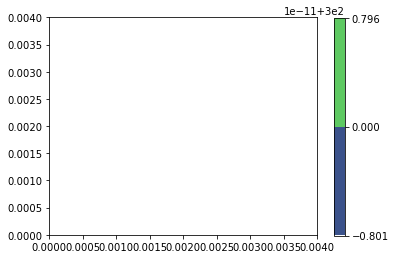

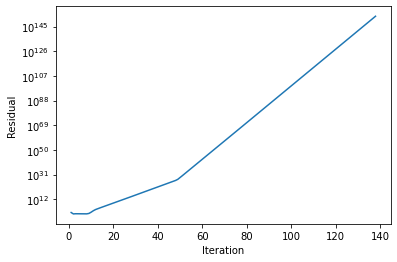

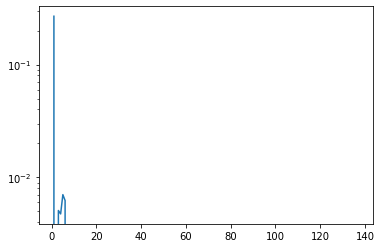

In [41]:
for ind in range(2000):
#thresh = 0.001
#while (residual[n] > thresh or n==0):
    n = n + 1
    t.append(t[n-1]+dt)

    T = T_new
    T_new = np.ones((n_x,n_y))

    # Set constant temperature boundary condition at first row
    T_new[:,0] = T_const

    # Set adiabatic for half of first row
    rho = [rho_a,rho_a,rho_a,rho_a,rho_a]
    c_p = [c_p_a,c_p_a,c_p_a,c_p_a,c_p_a]
    k = [k_a,k_a,k_a,k_a,k_a]
    ind_half = int(n_x/2)
    T_0 = [T[0,0],T[1,0],T[1,0],T[0,1],T[0,1]]
    T_new[0,0] = solver(T_0,rho,c_p,k,0,d2,d,dt,0)
    for i in np.arange(0,ind_half,dtype=int):
        T_1 = [T[0,0],T[i-1,0],T[i+1,0],T[0,1],T[0,1]]
        T_new[i,0] = solver(T_1,rho,c_p,k,0,d2,d,dt,0)


    # Step through the second row to the row just before the interface
    
    for j in np.arange(1,ind_interface,dtype=int):
        T_1 = [T[0,j],T[1,j],T[1,j],T[0,j-1],T[0,j+1]]
        T_2 = [T[n_x-1,j],T[n_x-2,j],T[n_x-2,j],T[n_x-1,j-1],T[n_x-1,j+1]]
        # Solve left side
        T_new[0,j] = solver(T_1,rho,c_p,k,0,d2,d,dt,0)
        # Solve right side
        T_new[n_x-1,j] = solver(T_2,rho,c_p,k,0,d2,d,dt,0)
        # Solve interior points
        for i in np.arange(1,n_x-1,dtype=int):
            T_3 = [T[i,j],T[i-1,j],T[i+1,j],T[i,j-1],T[i,j+1]]
            T_new[i,j] = solver(T_3,rho,c_p,k,0,d2,d,dt,0)

    # Solve for the interface
    j = ind_interface
    rho = [rho_avg,rho_avg,rho_avg,rho_a,rho_b]
    c_p = [c_p_avg,c_p_avg,c_p_avg,c_p_a,c_p_b]
    k = [k_avg,k_avg,k_avg,k_a,k_b]
    # Solve left side
    T_4 = [T[0,j],T[1,j],T[1,j],T[0,j-1],T[0,j+1]]
    T_new[0,j] = solver(T_4,rho,c_p,k,0,d2,d,dt,0)
    # Solve right side
    T_5 = [T[n_x-1,j],T[n_x-2,j],T[n_x-2,j],T[n_x-1,j-1],T[n_x-1,j+1]]
    T_new[n_x-1,j] = solver(T_5,rho,c_p,k,0,d2,d,dt,0)
    # Solve interior points
    for i in np.arange(1,n_x-1,dtype=int):
        T_6 = [T[i,j],T[i-1,j],T[i+1,j],T[i,j-1],T[i,j+1]]
        T_new[i,j] = solver(T_6,rho,c_p,k,0,d2,d,dt,0)

    rho = [rho_b,rho_b,rho_b,rho_b,rho_b]
    c_p = [c_p_b,c_p_b,c_p_b,c_p_b,c_p_b]
    k = [k_b,k_b,k_b,k_b,k_b]
    # Step through the row just after the interface until just before the convection

    for j in np.arange(ind_interface+1,n_y-1,dtype=int):
        T_7 = [T[0,j],T[1,j],T[1,j],T[0,j-1],T[0,j+1]]
        T_8 = [T[n_x-1,j],T[n_x-2,j],T[n_x-2,j],T[n_x-1,j-1],T[n_x-1,j+1]]
        # Solve left side
        T_new[0,j] = solver(T_7,rho,c_p,k,0,d2,d,dt,0)
        # Solve right side
        T_new[n_x-1,j] = solver(T_8,rho,c_p,k,0,d2,d,dt,0)
        # Solve interior points
        for i in np.arange(1,n_x-1,dtype=int):
            T_9 = [T[i,j],T[i-1,j],T[i+1,j],T[i,j-1],T[i,j+1]]
            T_new[i,j] = solver(T_9,rho,c_p,k,0,d2,d,dt,0)

    # Solve the convection boundary
    j = n_y-1
    # Solve left side
    T_10 = [T[0,j],T[1,j],T[1,j],T[0,j-1],T[0,j]]
    T_new[0,j] = solver(T_10,rho,c_p,k,h,d2,d,dt,T_f)
    # Solve right side
    T_11 = [T[n_x-1,j],T[n_x-2,j],T[n_x-2,j],T[n_x-1,j-1],T[n_x-1,j]]
    T_new[n_x-1,j] = solver(T_11,rho,c_p,k,h,d2,d,dt,T_f)
    # Solve interior points
    
    for i in np.arange(1,n_x-1,dtype=int):
        T_12 = [T[i,j],T[i-1,j],T[i+1,j],T[i,j-1],T[i,j]]
        T_new[i,j] = solver(T_12,rho,c_p,k,h,d2,d,dt,T_f)
    
    residual.append(np.linalg.norm(T_new)-np.linalg.norm(T))

#pd.DataFrame(np.flipud(np.transpose(T_new))).to_clipboard()
plot_T(x,y,T_new)

fig = plt.subplots()
plt.semilogy(np.arange(n+1),residual)
plt.xlabel("Iteration")
plt.ylabel("Residual")

convergence_rate = []
for i in np.arange(1,len(residual),dtype=int):
    convergence_rate.append(np.log(residual[i]/residual[i-1])/np.log(dt))

fig = plt.subplots()
plt.semilogy(np.arange(n),convergence_rate)


T = np.ones(n_x,n_y)
T_new = T

for n in range(500):
    T = T_new
    T_new = np.ones((n_x,n_y))

    # Set constant temperature boundary condition at first row
    T_new[:,0] = T_const

    # Step through the second row to the row just before the interface
    for j in np.arange(1,ind_interface,dtype=int):
        T_new[0,j] = solve_adiabatic_left(T,0,j,rho_a,c_p_a,k_a,dx2,dy2,dt)
        T_new[n_x-1,j] = solve_adiabatic_right(T,n_x-1,j,rho_a,c_p_a,k_b,dx2,dy2,dt)
        for i in np.arange(1,n_x-1,dtype=int):
            T_new[i,j] = solve_interior(T,i,j,rho_a,c_p_a,k_a,dx2,dy2,dt)

    # Solve for the interface
    j = ind_interface
    rho = (rho_a+rho_b)/2
    c_p = (c_p_a+c_p_b)/2
    T_new[0,j] = solve_adiabatic_left_interface(T,0,j,k_a,k_b,rho,c_p,dx2,dy2,dt)
    T_new[n_x-1,j] = solve_adiabatic_right_interface(T,n_x-1,j,k_a,k_b,rho,c_p,dx2,dy2,dt)
    for i in np.arange(1,n_x-1,dtype=int):
        T_new[i,j] = solve_interface(T,i,j,k_a,k_b,rho,c_p,dx2,dy2,dt)

    # Step through the row just after the interface until just before the convection
    for j in np.arange(ind_interface+1,n_y-1,dtype=int):
        T_new[0,j] = solve_adiabatic_left(T,0,j,rho_b,c_p_b,k_a,dx2,dy2,dt)
        T_new[n_x-1,j] = solve_adiabatic_right(T,n_x-1,j,rho_b,c_p_b,k_b,dx2,dy2,dt)
        for i in np.arange(1,n_x-1,dtype=int):
            T_new[i,j] = solve_interior(T,i,j,rho_b,c_p_b,k_a,dx2,dy2,dt)

    # Solve the convection boundary
    j = n_y-1
    T_new[0,j] = solve_convection_corner_left(T,0,j,k_b,rho_b,c_p_b,h,dx2,dy2,dy,dt)
    T_new[n_x-1,j] = solve_convection_corner_right(T,n_x-1,j,k_b,rho_b,c_p_b,h,dx2,dy2,dy,dt)
    for i in np.arange(1,n_x-1,dtype=int):
        T_new[i,j] = solve_convection(T,i,j,k_b,rho_b,c_p_b,h,dx2,dy2,dy,dt)
        